In [9]:
import pandas as pd
df=pd.read_csv("BankReviews.csv",encoding='windows-1252')
df

,Date,Stars,Reviews,BankName
0,10-04-2017,5,"Great job, Wyndham Capital! Each person was pr...",Wyndham Capital Mortgage
1,10-02-2017,5,Matthew Richardson is professional and helpful...,Wyndham Capital Mortgage
2,21-08-2017,5,We had a past experience with Wyndham Mortgage...,Wyndham Capital Mortgage
3,17-12-2017,5,We have been dealing with Brad Thomka from the...,Wyndham Capital Mortgage
4,27-05-2016,5,I can't express how grateful I am for the supp...,Wyndham Capital Mortgage
...,...,...,...,...
500,06-02-2016,1,\r\nI never write reviews but had to this time...,North American Savings Bank
501,25-07-2016,1,\r\nIt all started when Bob G ran a credit che...,North American Savings Bank
502,27-09-2017,1,\r\nWhat a horrible experience. We have excell...,North American Savings Bank
503,24-12-2017,1,"\r\nRep was extremely professional, friendly, ...",North American Savings Bank


In [10]:
df.head(9)

,Date,Stars,Reviews,BankName
0,10-04-2017,5,"Great job, Wyndham Capital! Each person was pr...",Wyndham Capital Mortgage
1,10-02-2017,5,Matthew Richardson is professional and helpful...,Wyndham Capital Mortgage
2,21-08-2017,5,We had a past experience with Wyndham Mortgage...,Wyndham Capital Mortgage
3,17-12-2017,5,We have been dealing with Brad Thomka from the...,Wyndham Capital Mortgage
4,27-05-2016,5,I can't express how grateful I am for the supp...,Wyndham Capital Mortgage
5,20-12-2016,5,I had the pleasure of working with Wyndham Cap...,Wyndham Capital Mortgage
6,17-12-2017,5,My experience with Mattison was beyond greatly...,Wyndham Capital Mortgage
7,16-08-2016,5,Patrick answered all my questions by email imm...,Wyndham Capital Mortgage
8,04-09-2017,5,I loved working with this group of people! The...,Wyndham Capital Mortgage


In [26]:
import csv
feedback=[]
counter=0
with open('BankReviews.csv',mode='r',encoding='windows-1252') as csv_file:
    reader=csv.DictReader(csv_file)
    for row in reader:
        counter+=1
        if(counter<=10):
            feedback.append(row['Reviews']+'.')

In [27]:
key="c8b6e05bd90342d39fd9d01e16616d2d"
endpoint="https://textals.cognitiveservices.azure.com/"

In [28]:
from azure.ai.textanalytics import TextAnalyticsClient
from azure.core.credentials import AzureKeyCredential

client=TextAnalyticsClient(endpoint=endpoint,credential=AzureKeyCredential(key))
response=client.analyze_sentiment(documents=feedback)
review=type('',(),{'positive':0,'negative':0,'neutral':0})()
for idx,sentence in enumerate(response):
    print("Sentence {}:{}".format(idx+1,sentence.sentiment))
    if(sentence.sentiment=="positive"):
        review.positive=review.positive+1
    elif(sentence.sentiment=="negative"):
        review.negative=review.negative+1
    else:
        review.neutral=review.neutral+1    



Sentence 1:positive
Sentence 2:positive
Sentence 3:positive
Sentence 4:positive
Sentence 5:positive
Sentence 6:positive
Sentence 7:mixed
Sentence 8:positive
Sentence 9:mixed
Sentence 10:positive


<BarContainer object of 3 artists>

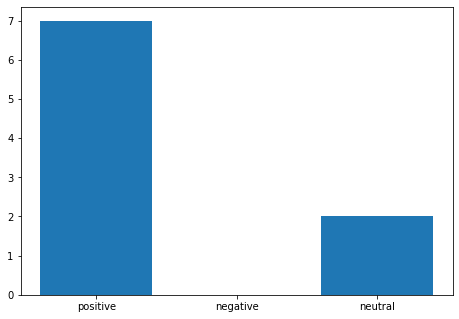

In [ ]:
import matplotlib.pyplot as plt
figure=plt.figure()
axs=figure.add_axes([0,0,1,1])
x_values=['positive','negative','neutral']
y_values=[review.positive,review.negative,review.neutral]
axs.bar(x_values,y_values)
